In [ ]:
%load_ext rpy2.ipython
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
file = pd.read_csv("/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/ADT_features_scaledata_BMNC.csv", index_col = 0)
#file = file.transpose()
#file.to_csv("/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/ADT_features_Transposed_scaledata_BMNC.csv")

In [ ]:
file.index.values

array(['a_AAACCTGAGCTTATCG-1', 'a_AAACCTGAGGTGGGTT-1',
       'a_AAACCTGAGTACATGA-1', ..., 'b_TTTGTCATCCTCGCAT-1',
       'b_TTTGTCATCGCCGTGA-1', 'b_TTTGTCATCGTTTGCC-1'], dtype=object)

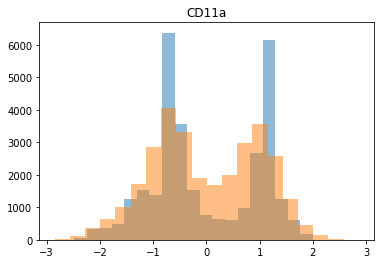

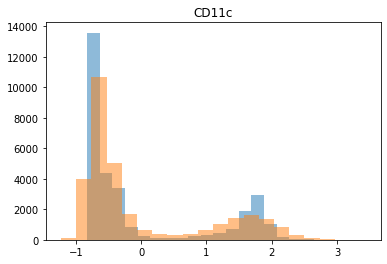

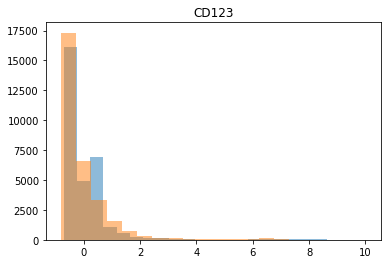

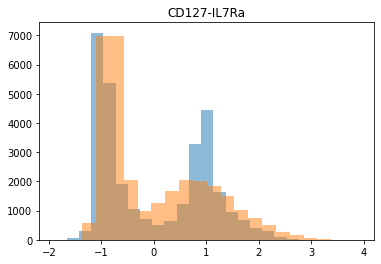

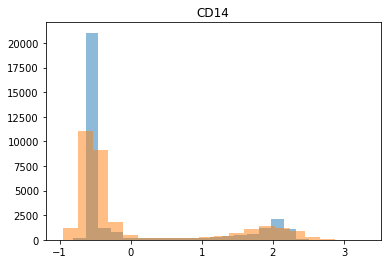

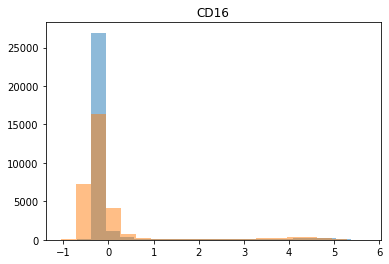

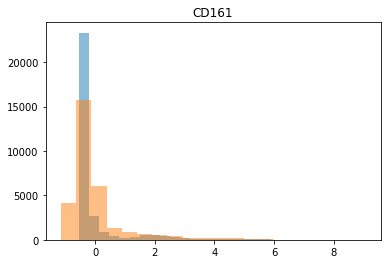

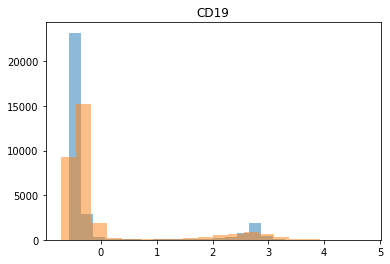

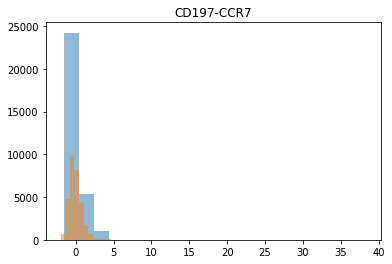

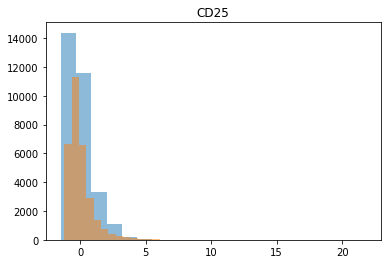

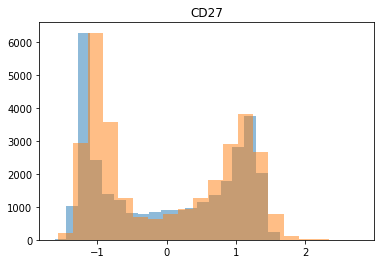

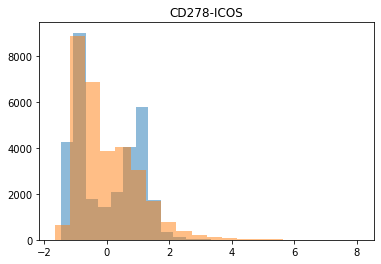

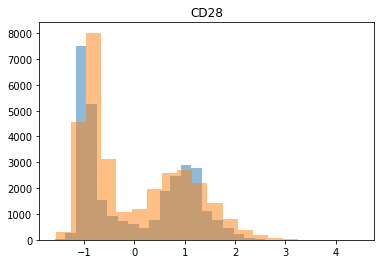

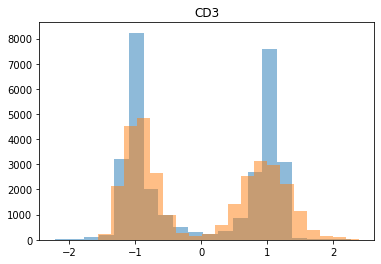

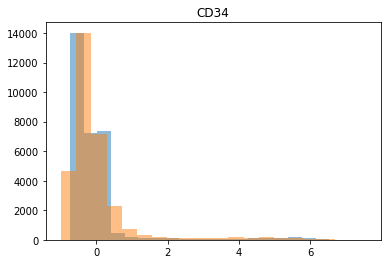

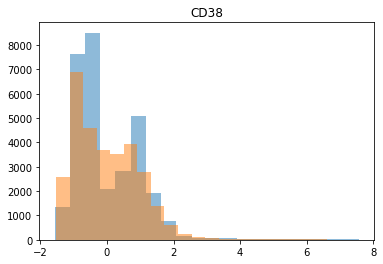

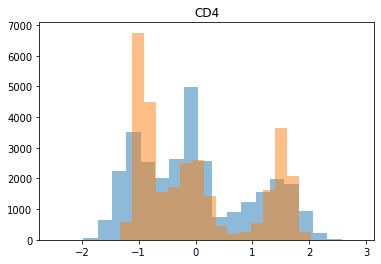

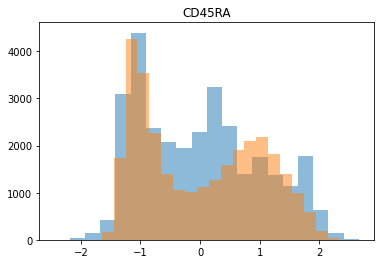

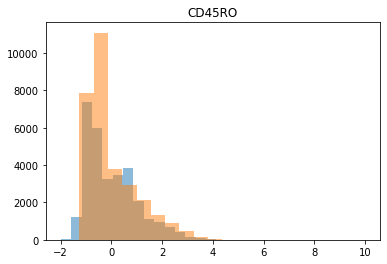

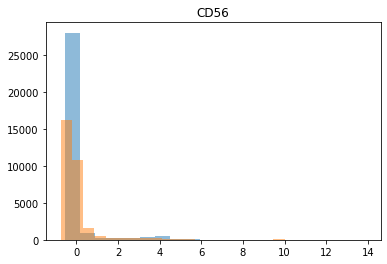

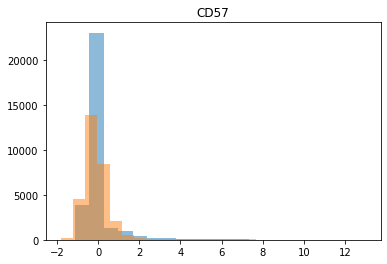

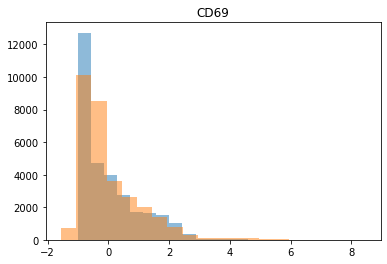

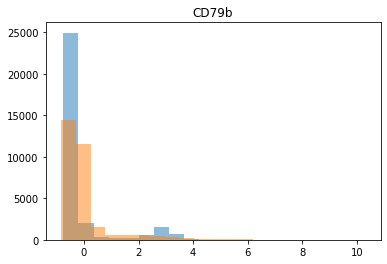

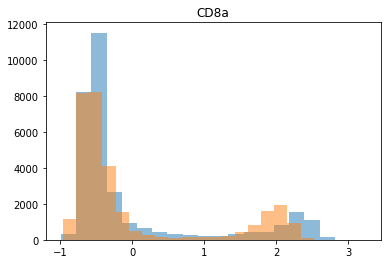

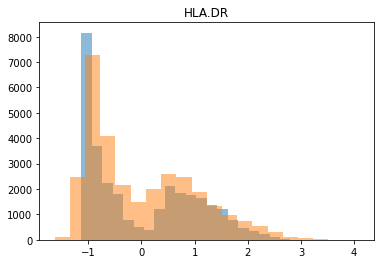

In [ ]:
for i in range(25):
    pred = np.load("/content/drive/MyDrive/Curriculars/AACB_course_project/Predictions/predictions_protein"+str(i+1)+".npy")
    pred = (pred - np.mean(pred))/np.std(pred)
    plt.hist(pred, alpha = 0.5, bins = 20)
    plt.hist(file[file.columns[i]], alpha = 0.5, bins=20)
    plt.title(file.columns[i])
    plt.show()

In [ ]:
with open('/content/drive/MyDrive/Curriculars/AACB_course_project/ADT_XGBoost_prediction.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    l = [""]
    for val in file.index.values:
        l.append(val)
    writer.writerow(l);

    for i in range(25):
        pred = np.load("/content/drive/MyDrive/Curriculars/AACB_course_project/Predictions/predictions_protein"+str(i+1)+".npy")
        #pred = (pred - np.mean(pred))/np.std(pred)
        l = [file.columns[i]]
        for pred_i in pred:
            l.append(pred_i)
        writer.writerow(l)

In [ ]:
%%R
install.packages("Seurat")

R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmpkODbPT/downloaded_packages’
R[write to console]: 
R[write to console]: 



In [ ]:
%%R
library(Seurat)

library(cowplot)
library(dplyr)
library(data.table)

pred <- read.csv("/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/ADT_XGBoost_prediction.csv", row.names= 1)
#rownames(pred) <- pred[1:25,1]

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘data.table’


R[write to console]: The following objects are masked from ‘package:dplyr’:

    between, first, last




In [ ]:
%%R
bm.pADT <- pred
load("/content/drive/MyDrive/Curriculars/AACB_course_project/Datasets/bmnc.RData")

In [ ]:
%%R
bm[["pADT"]] <- CreateAssayObject(counts = bm.pADT)

R[write to console]: Error: All cells in the object being added must match the cells in this object




Error: All cells in the object being added must match the cells in this object
